#### Thanks to Walker Harrison 
###### Code snippets taken from https://github.com/WalkerHarrison/Google_searches

In [24]:
import json
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

# Download the google data and save in the same folder as this notebook in a folder named "Data/Takeout/"(all the folders which google provides, make sure folder named 'Searches' is present) 

In [25]:
#your file path here!
files= os.listdir('Data/Takeout/Searches')

searches =[]
dates = []
for file in files:
    with open('Data/Takeout/Searches/%s'%(file)) as json_data:
        d = json.load(json_data)
    for i in range(len(d['event'])):
        for j in range(len((d['event'][i][u'query'][u'id']))):
            searches.append(d['event'][i][u'query'][u'query_text']) 
            dates.append(d['event'][i][u'query'][u'id'][j][u'timestamp_usec'])

dates = [datetime.datetime.fromtimestamp(int(i)/1000000).strftime('%Y-%m-%d %H:%M:%S') for i in dates]
searches = [i.encode('utf-8') for i in searches]

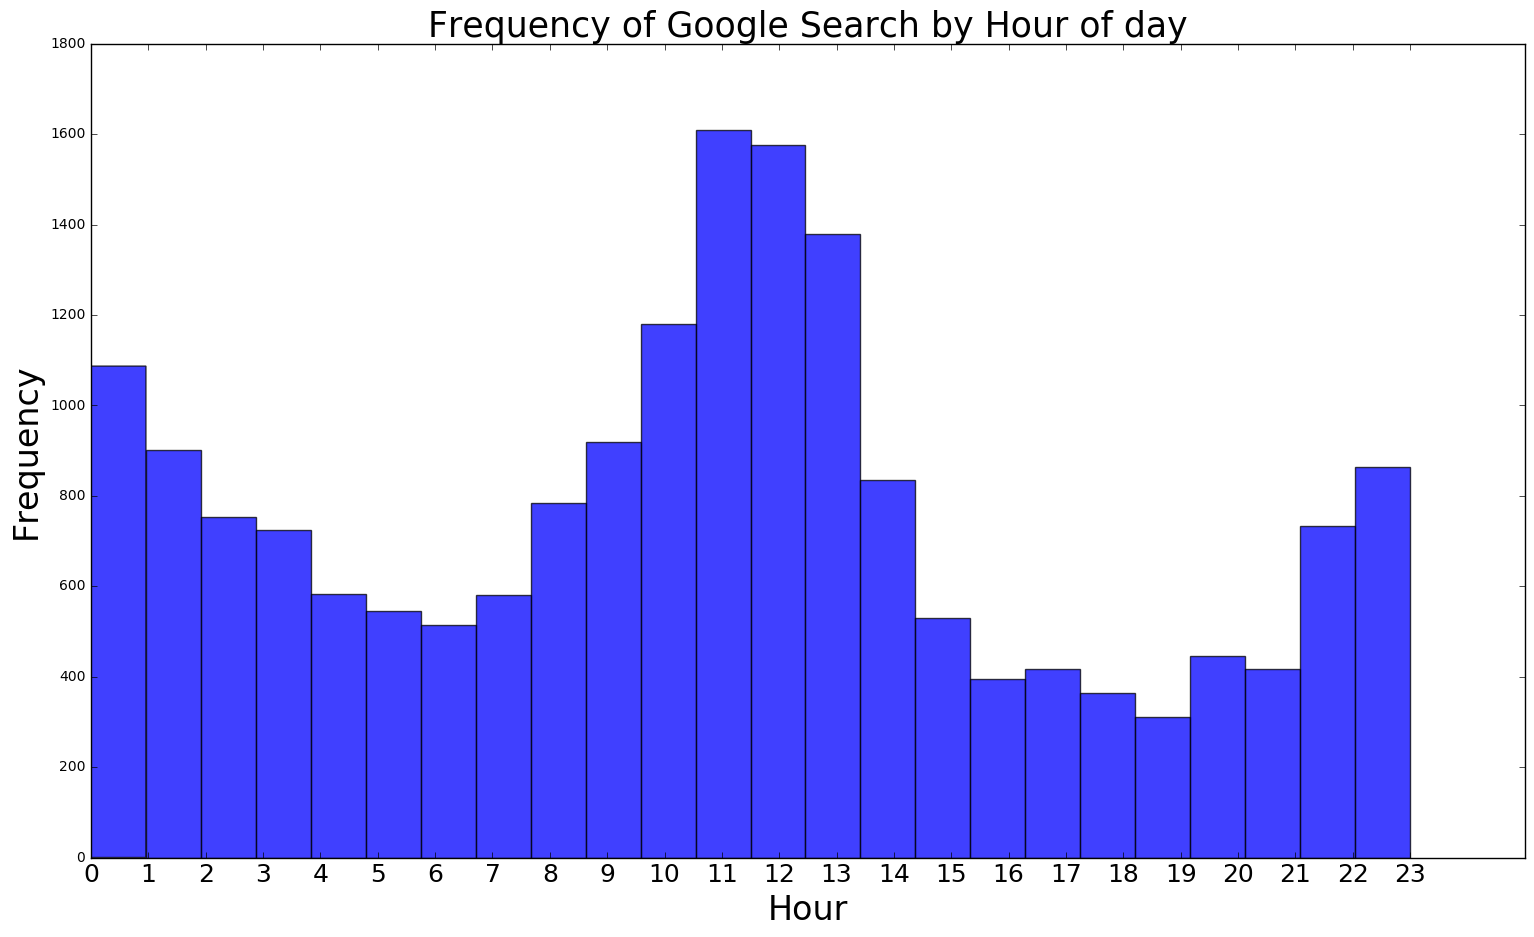

In [8]:
hours = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').hour for i in dates]
n, bins, patches = plt.hist(hours, 24, facecolor='blue', alpha=0.75)
plt.xticks(range(24), range(24), fontsize=18)
plt.xlabel('Hour', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.title("Frequency of Google Search by Hour of day", fontsize=25)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

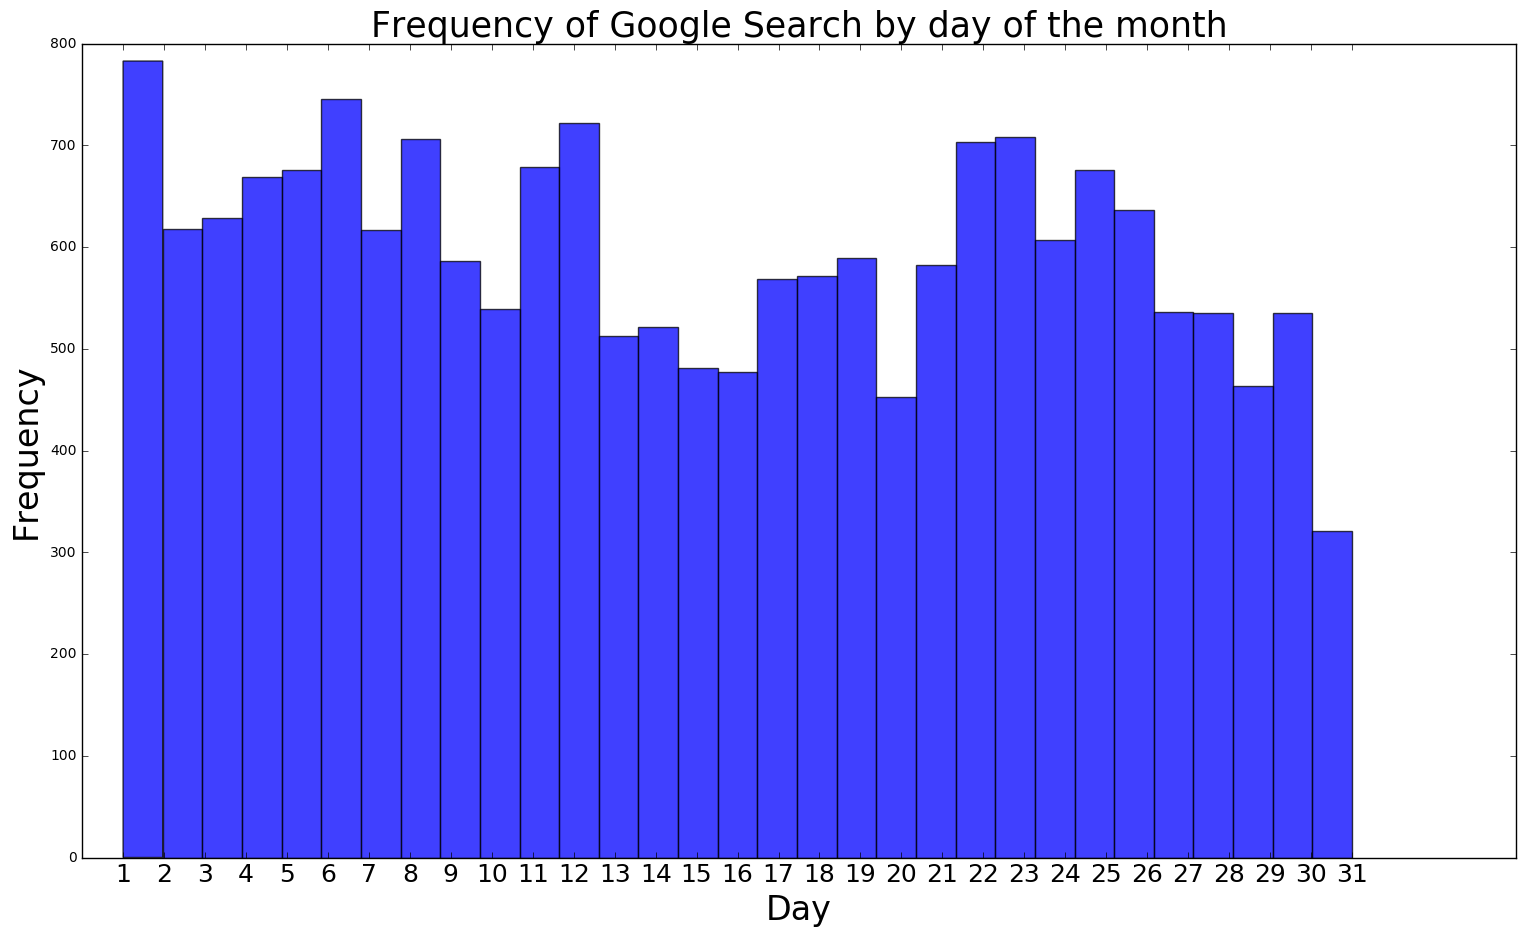

In [10]:
days = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').day for i in dates]
n, bins, patches = plt.hist(days, 31, facecolor='blue', alpha=0.75)
plt.xticks(range(1,32), range(1,32), fontsize=18)
plt.xlabel('Day', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.title("Frequency of Google Search by day of the month", fontsize=25)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

# The freqency of searches on 31st is low becuse not all the months have 31 days

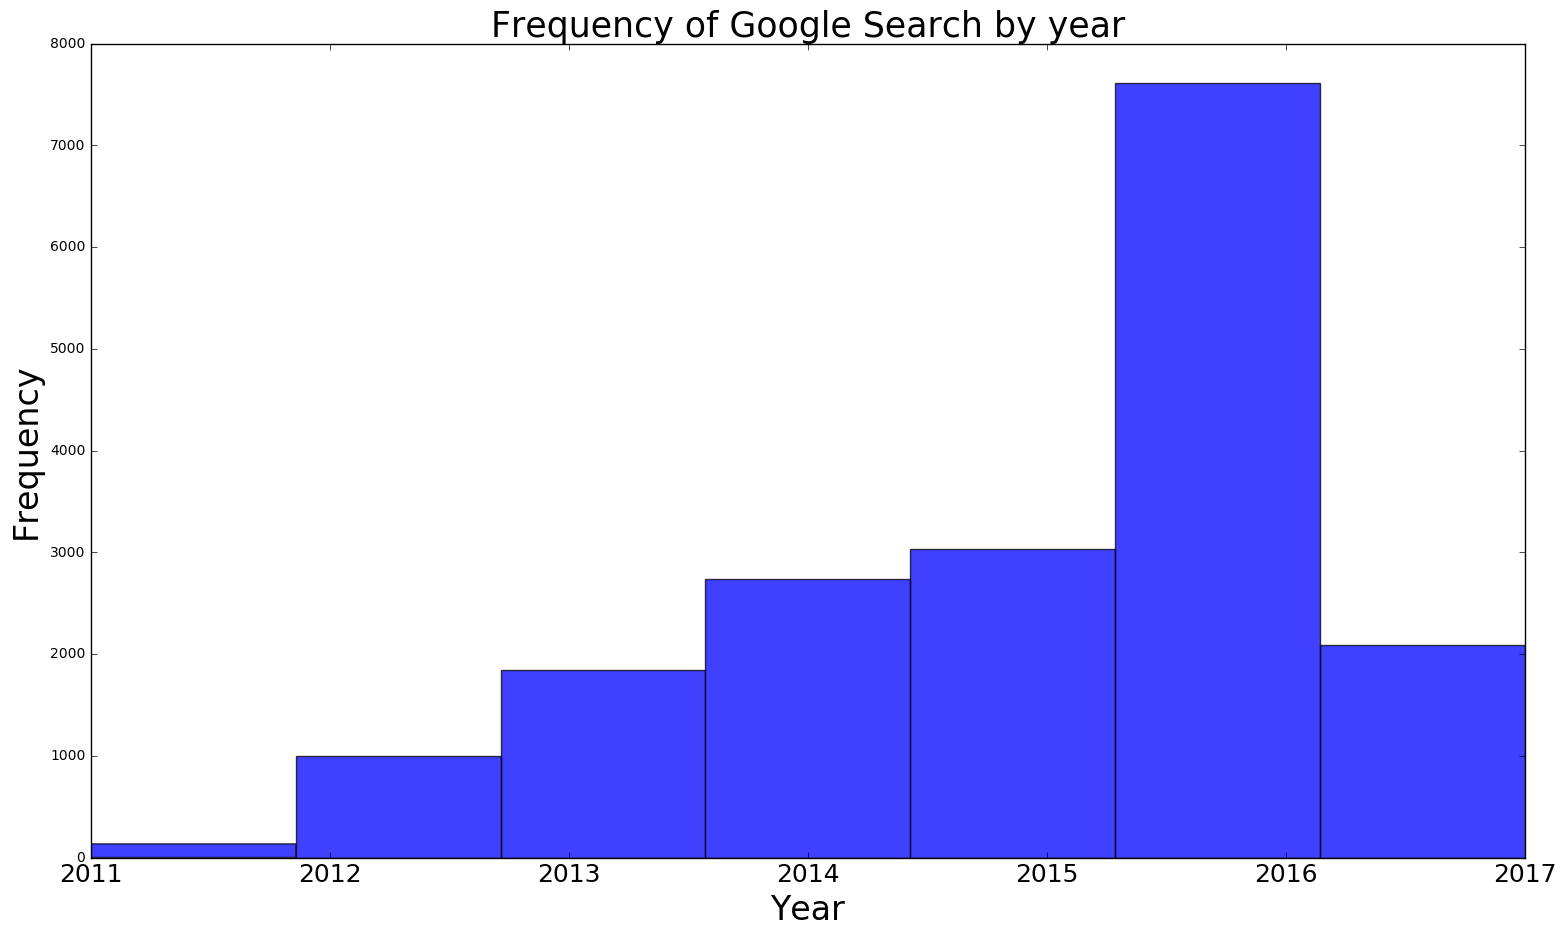

In [12]:
years = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').year for i in dates]
n, bins, patches = plt.hist(years,7 , facecolor='blue', alpha=0.75)
plt.xticks(range(2011,2018), range(2011,2018), fontsize=18)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.title("Frequency of Google Search by year", fontsize=25)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

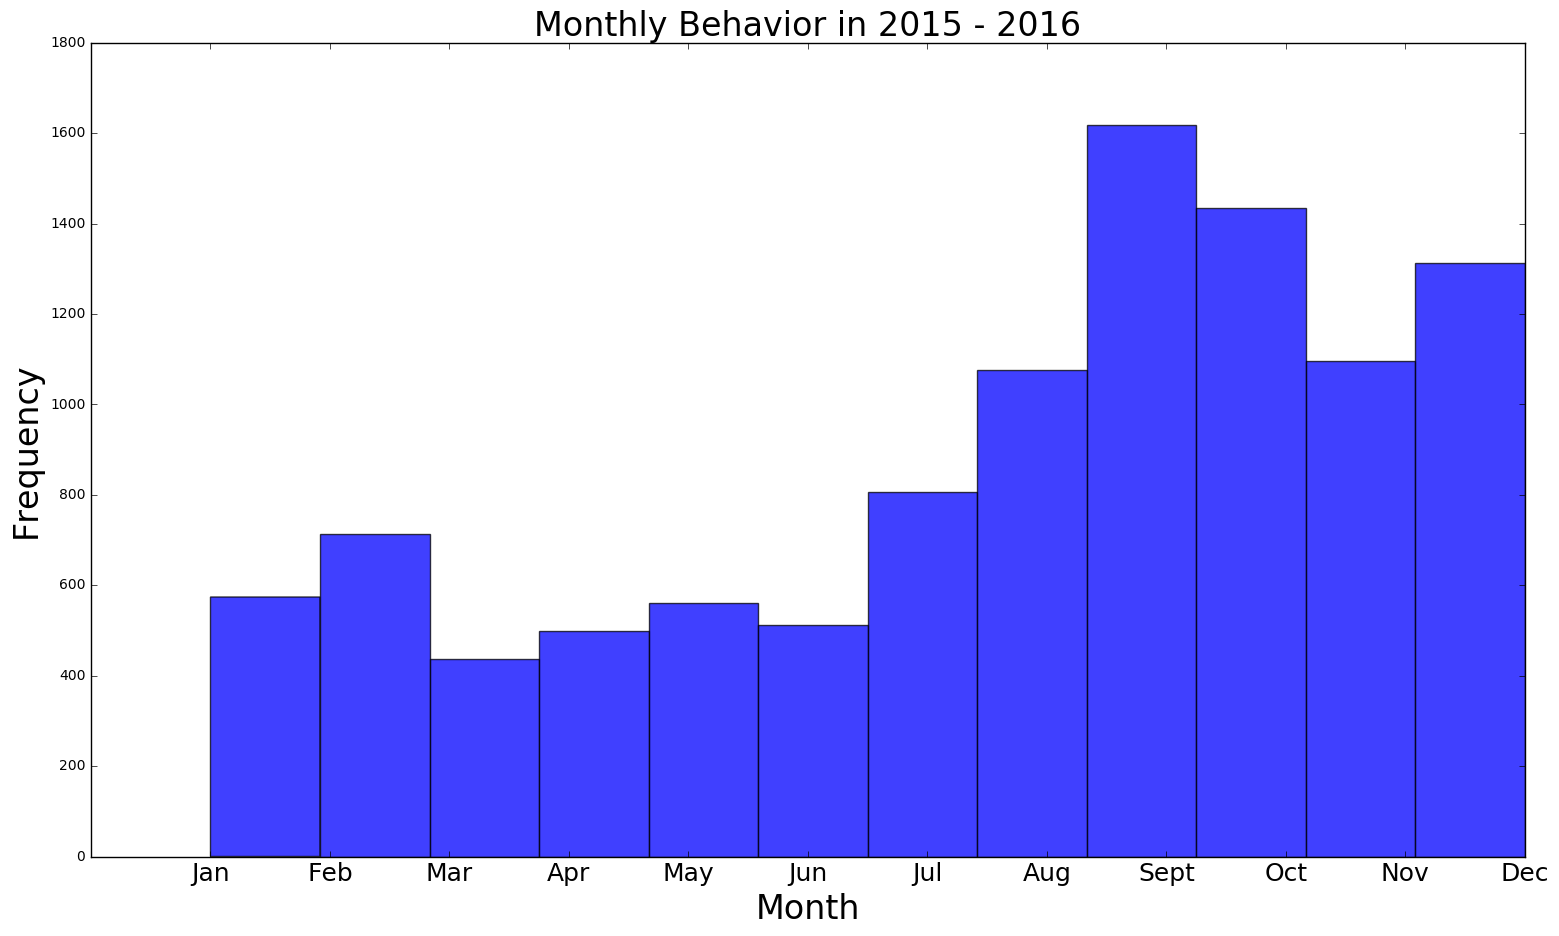

In [13]:
months = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').month 
 for i in filter(lambda x: (int(x[:4]) >= 2015) & (int(x[:4]) < 2017), dates)]
n, bins, patches = plt.hist(months,12 , facecolor='blue', alpha=0.75)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], fontsize=18)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.title("Monthly Behavior in 2015 - 2016",fontsize=24)
plt.show()

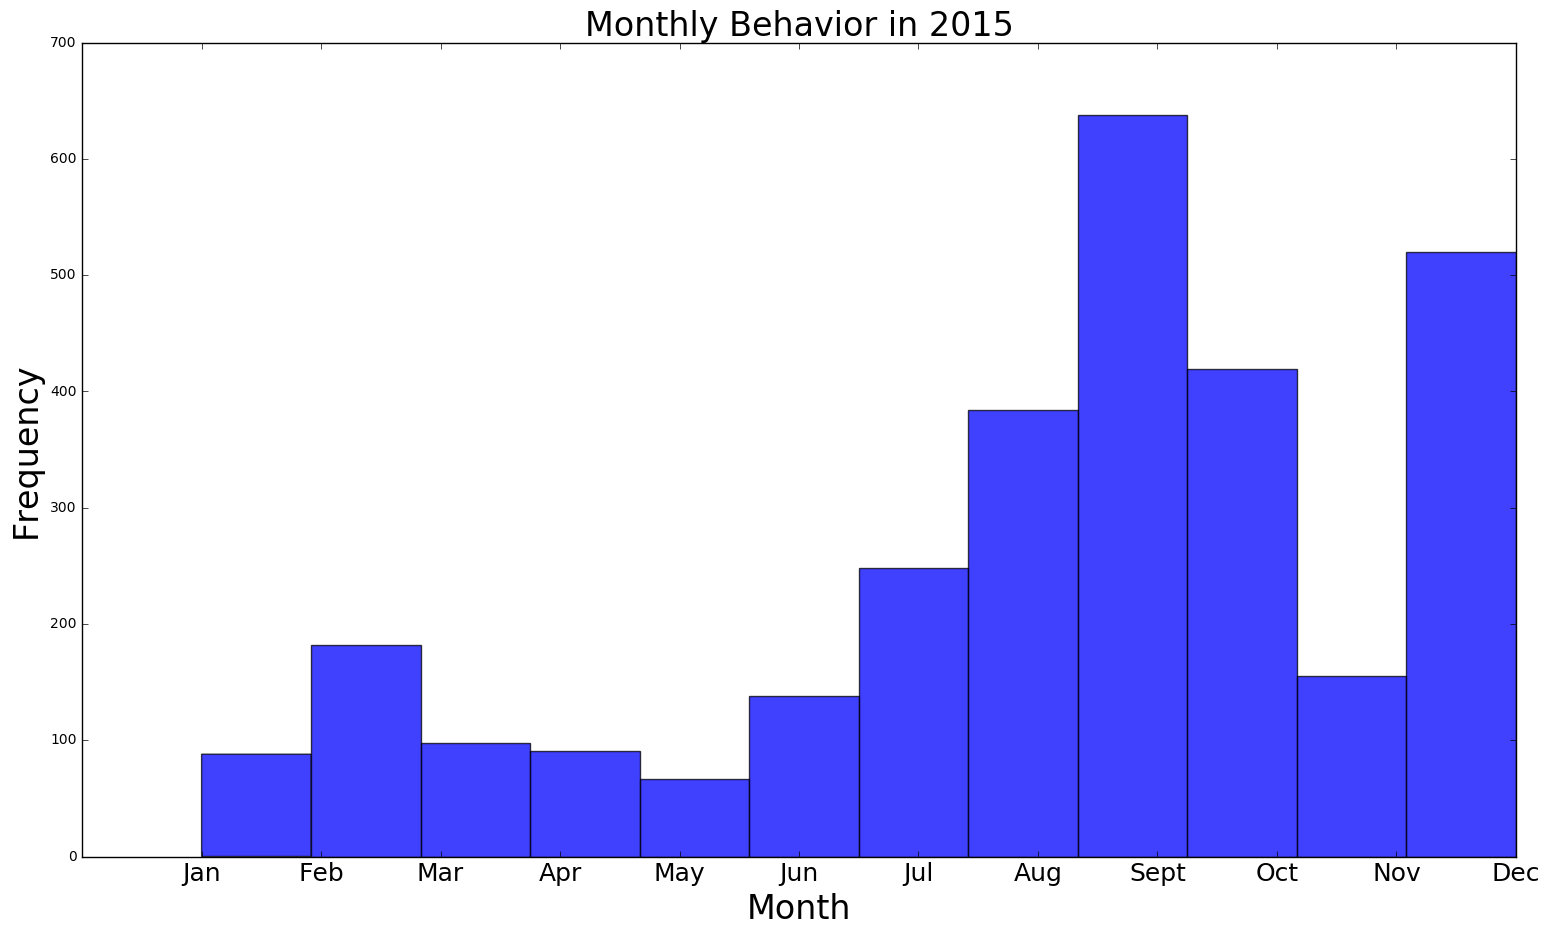

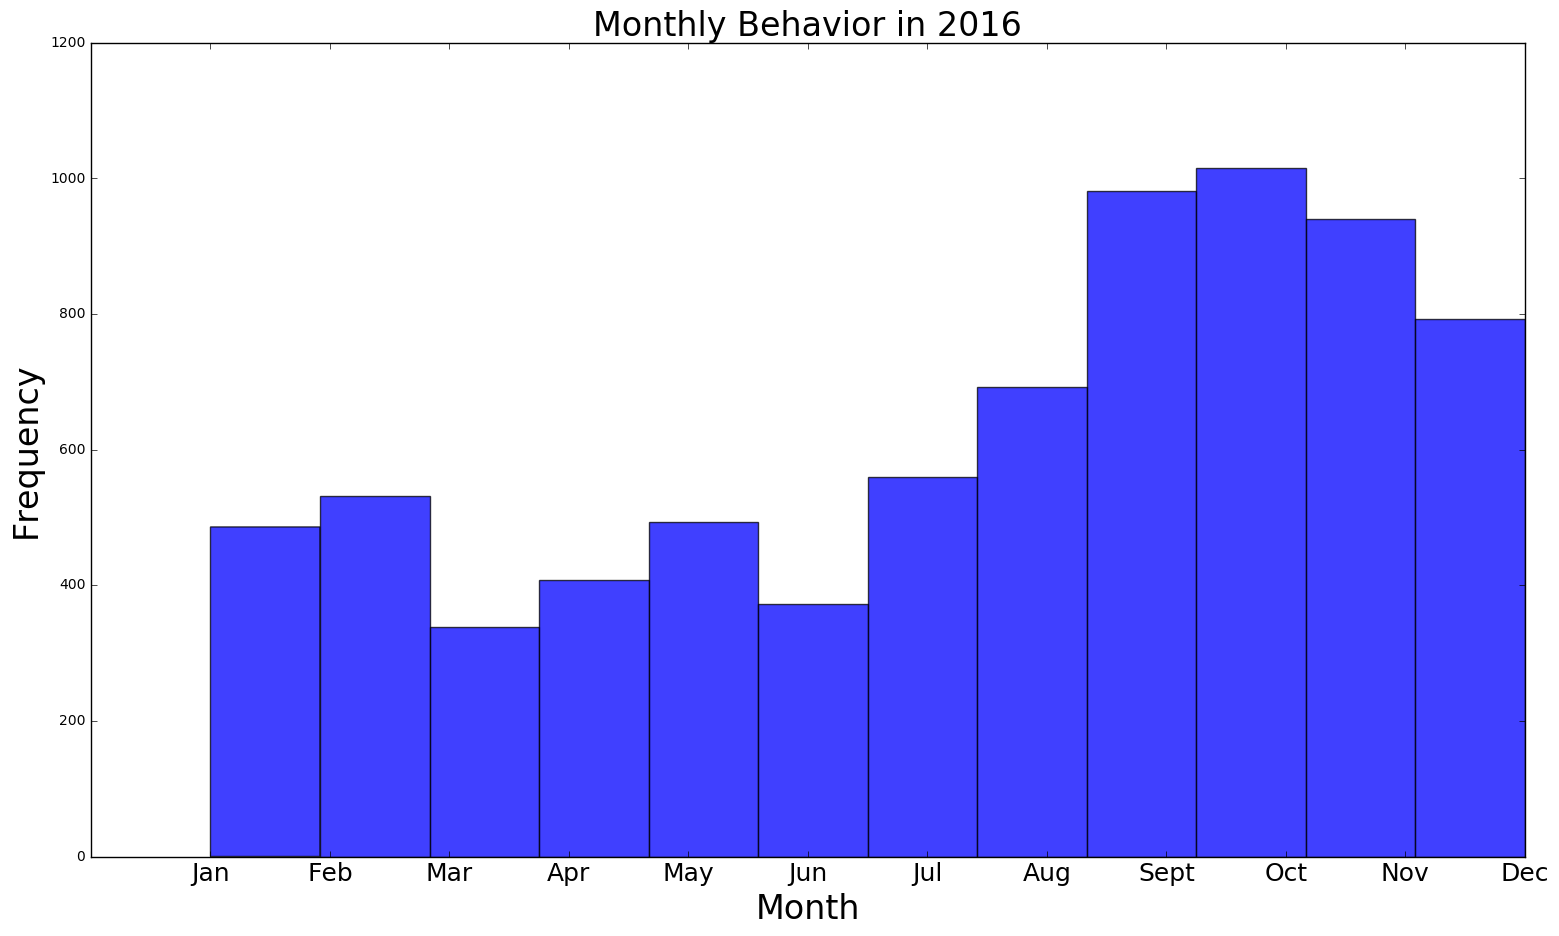

In [14]:
months = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').month 
 for i in filter(lambda x: (int(x[:4]) == 2015), dates)]
n, bins, patches = plt.hist(months,12 , facecolor='blue', alpha=0.75)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], fontsize=18)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.title("Monthly Behavior in 2015",fontsize=24)
plt.show()

months = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').month 
 for i in filter(lambda x: (int(x[:4]) == 2016), dates)]
n, bins, patches = plt.hist(months,12 , facecolor='blue', alpha=0.75)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], fontsize=18)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.title("Monthly Behavior in 2016",fontsize=24)
plt.show()

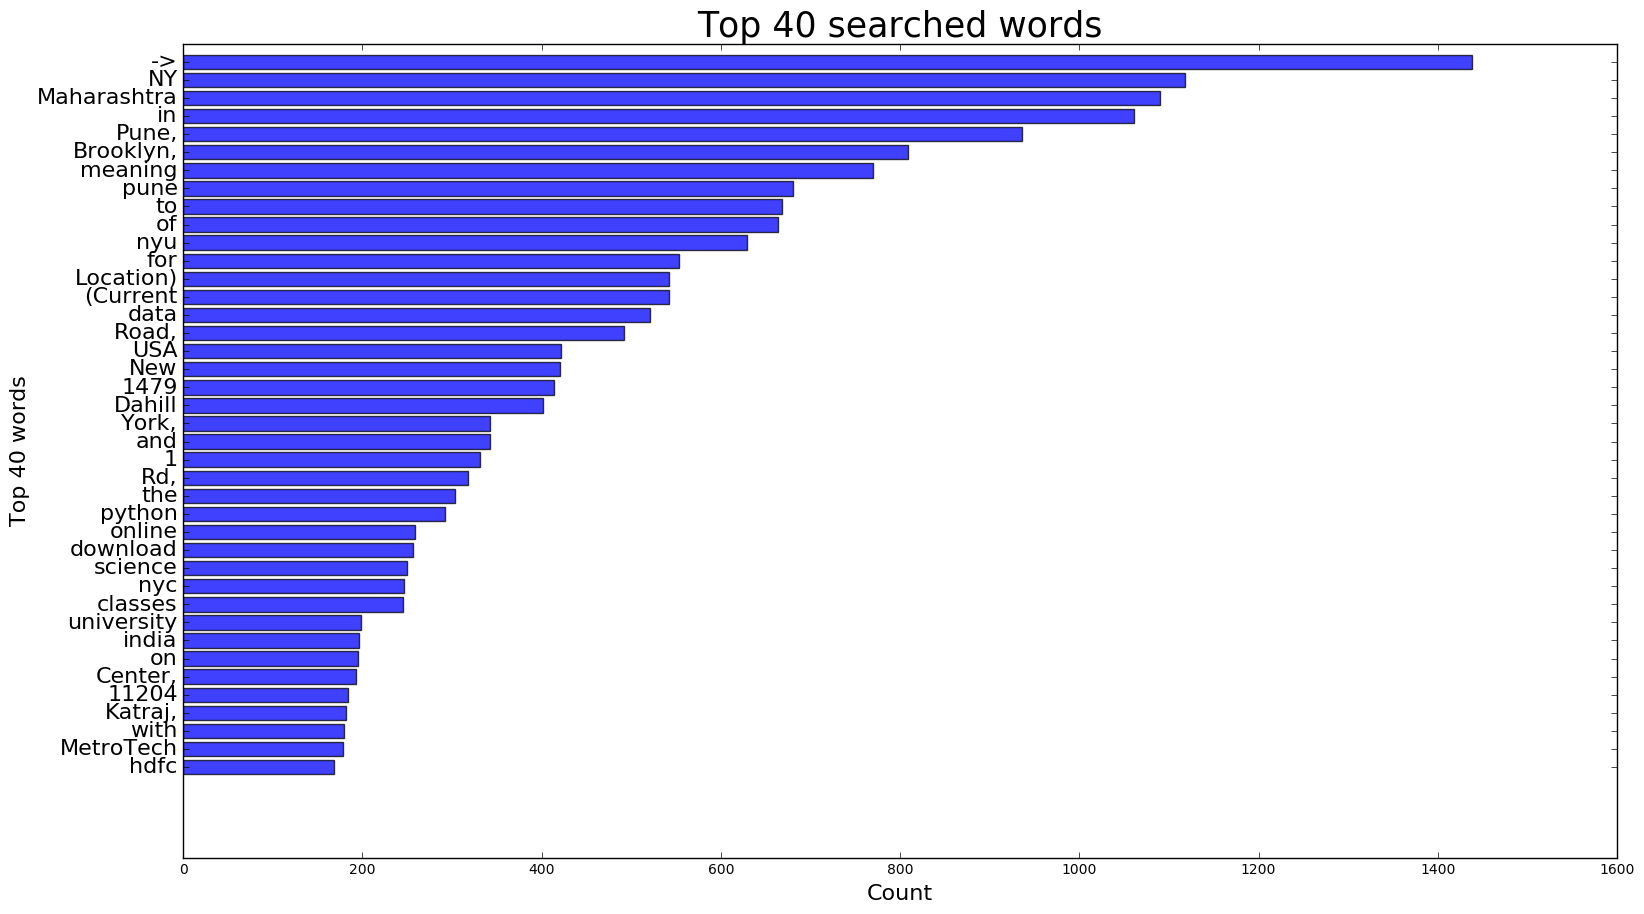

In [28]:
combo = ' '.join(searches)
freqs = Counter(combo.split())
top = freqs.most_common(40)

words = []
counts = []
for i in range(40):
    words.append(top[i][0])
    counts.append(top[i][1])

words.reverse()
counts.reverse()

plt.barh(range(40), counts, align='center', color='b', alpha=0.75)
plt.yticks(range(40), words, fontsize=16)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.ylabel("Top 40 words", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.title("Top 40 searched words", fontsize=25)
plt.show()

In [18]:
files= os.listdir('Data/Takeout/Searches')

searches = []
for file in files:
    with open('Data/Takeout/Searches/%s'%(file)) as json_data:
        d = json.load(json_data)
    for i in range(len(d['event'])):
        for j in range(len((d['event'][i][u'query'][u'id']))):
            date = datetime.datetime.fromtimestamp(int(d['event'][i]
                                                       [u'query'][u'id'][j]
                                                       [u'timestamp_usec'])/1000000).strftime('%Y-%m-%d %H:%M:%S')
            sterm = (d['event'][i][u'query'][u'query_text']).encode('utf-8')
            searches.append((sterm, date)) 

# Enter Keyword 

In [19]:
key_word = raw_input("Enter keyword: ")
print "\n"
for i in range(len(searches)):
    if (key_word).lower() in (searches[i][0]).lower():
        print searches[i][0], datetime.datetime.strptime(searches[i][1] , '%Y-%m-%d %H:%M:%S')

Enter keyword: saver


screensavers 2013-09-20 14:42:57
du battery saver 2016-01-23 12:22:10
